In [1]:
# Import dependencies
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

# Store CSV into DataFrame

In [2]:
# create country population dataframe
csv_file = "Resources/country_population_edit.csv"
pop_df = pd.read_csv(csv_file)
pop_df.head()

,country_name,country_code,indicator_name,indicator_code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [3]:
# create life expectancy dataframe
csv_file = "Resources/life_expectancy_edit.csv"
life_df = pd.read_csv(csv_file)
life_df.head()

,country_name,country_code,indicator_name,indicator_code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# create fertility rate dataframe
csv_file = "Resources/fertility_rate_edit.csv"
fert_df = pd.read_csv(csv_file)
fert_df.head()

,country_name,country_code,indicator_name,indicator_code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.478,7.524,7.563,7.592,7.611,7.619,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleansing

#### Country Population dataframe cleansing

In [5]:
pop_df.count()

country_name      264
country_code      264
indicator_name    264
indicator_code    264
1960              260
                 ... 
2012              262
2013              262
2014              262
2015              262
2016              262
Length: 61, dtype: int64

In [6]:
pop_df.dtypes

country_name       object
country_code       object
indicator_name     object
indicator_code     object
1960              float64
                   ...   
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
Length: 61, dtype: object

In [7]:
# drop NaN's
no_null_pop_df = pop_df.dropna(how='any')

# drop column indicator_codenew
new_pop_df = no_null_pop_df.drop(columns=['indicator_code'])

# remove ", total" from indicator name
new_pop_df['indicator_name'] = new_pop_df['indicator_name'].replace({'Population, total': 'population'})

# set country_code as index
# new_pop_df.set_index("country_code", inplace=True)

new_pop_df.head()

,country_name,country_code,indicator_name,1960,1961,1962,1963,1964,1965,1966,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,population,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,population,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,population,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,population,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,population,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


#### Life Expectancy dataframe cleansing

In [8]:
# drop NaN's
no_null_life_df = life_df.dropna(how='any')

# drop column indicator_code
new_life_df = no_null_life_df.drop(columns=['indicator_code'])

# remove ", total" from indicator name
new_life_df['indicator_name'] = new_life_df['indicator_name'].replace({'Life expectancy at birth, total (years)': 'life_expectancy'})

# set country_code as index
# new_life_df.set_index("country_code", inplace=True)

new_life_df.head()

,country_name,country_code,indicator_name,1960,1961,1962,1963,1964,1965,1966,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,life_expectancy,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762,...,74.576000,74.72500,74.872000,75.016000,75.158000,75.299000,75.440000,75.582000,75.725000,75.867000
1,Afghanistan,AFG,life_expectancy,32.292000,32.742000,33.185000,33.624000,34.060000,34.495000,34.928,...,59.694000,60.24300,60.754000,61.226000,61.666000,62.086000,62.494000,62.895000,63.288000,63.673000
2,Angola,AGO,life_expectancy,33.251000,33.573000,33.914000,34.272000,34.645000,35.031000,35.426,...,55.096000,56.18900,57.231000,58.192000,59.042000,59.770000,60.373000,60.858000,61.241000,61.547000
3,Albania,ALB,life_expectancy,62.279000,63.298000,64.187000,64.911000,65.461000,65.848000,66.108,...,75.656000,75.94300,76.281000,76.652000,77.031000,77.389000,77.702000,77.963000,78.174000,78.345000
5,Arab World,ARB,life_expectancy,46.825065,47.407699,47.988878,48.572229,49.159167,49.744338,50.319,...,69.424552,69.64697,69.851434,70.041054,70.223894,70.408016,70.598298,70.793957,70.994541,71.198456


#### Fertility Rates dataframe cleansing

In [9]:
# drop NaN's
no_null_fert_df = fert_df.dropna(how='any')

# drop column indicator_code
new_fert_df = no_null_fert_df.drop(columns=['indicator_code'])

# remove ", total" from indicator name
new_fert_df['indicator_name'] = new_fert_df['indicator_name'].replace({'Fertility rate, total (births per woman)': 'fertility_rates'})

# set country_code as index
# new_fert_df.set_index("country_code", inplace=True)

new_fert_df.head()

,country_name,country_code,indicator_name,1960,1961,1962,1963,1964,1965,1966,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,fertility_rates,4.820000,4.65500,4.47100,4.271000,4.059000,3.842000,3.625000,...,1.763000,1.764000,1.769000,1.776000,1.783000,1.791000,1.796000,1.800000,1.80100,1.800000
1,Afghanistan,AFG,fertility_rates,7.450000,7.45000,7.45000,7.450000,7.450000,7.450000,7.450000,...,6.460000,6.254000,6.038000,5.816000,5.595000,5.380000,5.174000,4.981000,4.80200,4.635000
2,Angola,AGO,fertility_rates,7.478000,7.52400,7.56300,7.592000,7.611000,7.619000,7.618000,...,6.368000,6.307000,6.238000,6.162000,6.082000,6.000000,5.920000,5.841000,5.76600,5.694000
3,Albania,ALB,fertility_rates,6.489000,6.40100,6.28200,6.133000,5.960000,5.773000,5.581000,...,1.668000,1.650000,1.646000,1.653000,1.668000,1.685000,1.700000,1.710000,1.71400,1.713000
5,Arab World,ARB,fertility_rates,6.948747,6.97137,6.99235,7.009265,7.020105,7.023159,7.015824,...,3.476805,3.470126,3.469736,3.471666,3.470003,3.461347,3.442829,3.413299,3.37384,3.326532


# Combined dataframes into one dataframe

In [10]:
frames = [new_pop_df, new_life_df, new_fert_df]

results = pd.concat(frames).sort_values(by='country_code')
results.head()

,country_name,country_code,indicator_name,1960,1961,1962,1963,1964,1965,1966,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,population,54211.000,55438.000,56225.000,56695.000,57032.000,57360.000,5.771500e+04,...,1.012200e+05,1.013530e+05,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05
0,Aruba,ABW,fertility_rates,4.820,4.655,4.471,4.271,4.059,3.842,3.625000e+00,...,1.763000e+00,1.764000e+00,1.769000e+00,1.776000e+00,1.783000e+00,1.791000e+00,1.796000e+00,1.800000e+00,1.801000e+00,1.800000e+00
0,Aruba,ABW,life_expectancy,65.662,66.074,66.444,66.787,67.113,67.435,6.776200e+01,...,7.457600e+01,7.472500e+01,7.487200e+01,7.501600e+01,7.515800e+01,7.529900e+01,7.544000e+01,7.558200e+01,7.572500e+01,7.586700e+01
1,Afghanistan,AFG,population,8996351.000,9166764.000,9345868.000,9533954.000,9731361.000,9938414.000,1.015233e+07,...,2.661679e+07,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07
1,Afghanistan,AFG,fertility_rates,7.450,7.450,7.450,7.450,7.450,7.450,7.450000e+00,...,6.460000e+00,6.254000e+00,6.038000e+00,5.816000e+00,5.595000e+00,5.380000e+00,5.174000e+00,4.981000e+00,4.802000e+00,4.635000e+00


In [11]:
results.columns

Index(['country_name', 'country_code', 'indicator_name', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object')

In [12]:
# convert multiple year columns to one year column
results2 = results.melt(id_vars=['country_code', 'country_name', 'indicator_name'], 
                        value_vars=['1960', '1961','1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', 
                                    '1970','1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
                                    '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988','1989', 
                                    '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997','1998', '1999', 
                                    '2000', '2001', '2002', '2003', '2004', '2005', '2006','2007', '2008', '2009', 
                                    '2010', '2011', '2012', '2013', '2014', '2015','2016'], 
                        var_name='year', 
                        value_name='results')

results2.head()

,country_code,country_name,indicator_name,year,results
0,ABW,Aruba,population,1960,54211.000
1,ABW,Aruba,fertility_rates,1960,4.820
2,ABW,Aruba,life_expectancy,1960,65.662
3,AFG,Afghanistan,population,1960,8996351.000
4,AFG,Afghanistan,fertility_rates,1960,7.450


In [13]:
# Create the decade bins 
bins = [1960, 1969, 1979, 1989, 1999, 2009, 2020]

# Create the names for the bins
group_names = ["1960", "1970", "1980", "1990", "2000", "2010"]

# coverting year column datatype to interger
results2['year'] = results2['year'].astype(int)

# add bin column to dataframe
results2["decade"] = pd.cut(results2["year"], bins, labels=group_names, include_lowest=True)

# reorganize columns
results2 = results2[['country_code', 'country_name', 'indicator_name', 
                     'year', 'decade', 'results']]

results2.head()

,country_code,country_name,indicator_name,year,decade,results
0,ABW,Aruba,population,1960,1960,54211.000
1,ABW,Aruba,fertility_rates,1960,1960,4.820
2,ABW,Aruba,life_expectancy,1960,1960,65.662
3,AFG,Afghanistan,population,1960,1960,8996351.000
4,AFG,Afghanistan,fertility_rates,1960,1960,7.450


In [14]:
r3 = results2.pivot_table(index=["country_name", "year", "decade"], columns=["indicator_name"], 
                          values="results").reset_index().rename_axis(None, axis=1)
r3

,country_name,year,decade,fertility_rates,life_expectancy,population
0,Afghanistan,1960,1960,7.450,32.292,8996351.0
1,Afghanistan,1961,1960,7.450,32.742,9166764.0
2,Afghanistan,1962,1960,7.450,33.185,9345868.0
3,Afghanistan,1963,1960,7.450,33.624,9533954.0
4,Afghanistan,1964,1960,7.450,34.060,9731361.0
...,...,...,...,...,...,...
14815,Zimbabwe,2012,2010,3.996,56.516,14710826.0
14816,Zimbabwe,2013,2010,3.957,58.053,15054506.0
14817,Zimbabwe,2014,2010,3.903,59.360,15411675.0
14818,Zimbabwe,2015,2010,3.836,60.398,15777451.0


# Create sqlite database

In [15]:
# db_connection_string = "postgres:postgres@losthost:5432/postgres"
# rds_connection_string = "<insert user name>:<insert password>@localhost:5432/customer_db"
sql_lite = "sqlite:///ETL_sqlite_database.db"

In [16]:
# engine = create_engine(f'postgresql://{db_connection_string}) 
engine = create_engine(sql_lite)                

In [17]:
# sending dataframe to table in sqlite (if_exists can be changed to fail, replace, append) 
r3.to_sql(name="all_data_tbl", con=engine, if_exists="replace", index=False)

In [18]:
# verify table(s) exists
engine.table_names()

['all_data_tbl', 'test']

In [19]:
df = pd.read_sql_query('select * from all_data_tbl', con=engine)
df.to_html("output.html",index=False)

df.head()

,country_name,year,decade,fertility_rates,life_expectancy,population
0,Afghanistan,1960,1960,7.45,32.292,8996351.0
1,Afghanistan,1961,1960,7.45,32.742,9166764.0
2,Afghanistan,1962,1960,7.45,33.185,9345868.0
3,Afghanistan,1963,1960,7.45,33.624,9533954.0
4,Afghanistan,1964,1960,7.45,34.060,9731361.0


Q1. How had the world population changed during the analyzed time frame? 

In [20]:
world_df = df.groupby("year").sum()
world_df.head()

,fertility_rates,life_expectancy,population
year,,,
1960,1297.649264,12541.246266,3.071885e+10
1961,1296.769895,12653.048262,3.113195e+10
1962,1294.638381,12745.865054,3.168369e+10
1963,1291.444232,12852.478366,3.237015e+10
1964,1285.829747,12968.105175,3.306206e+10


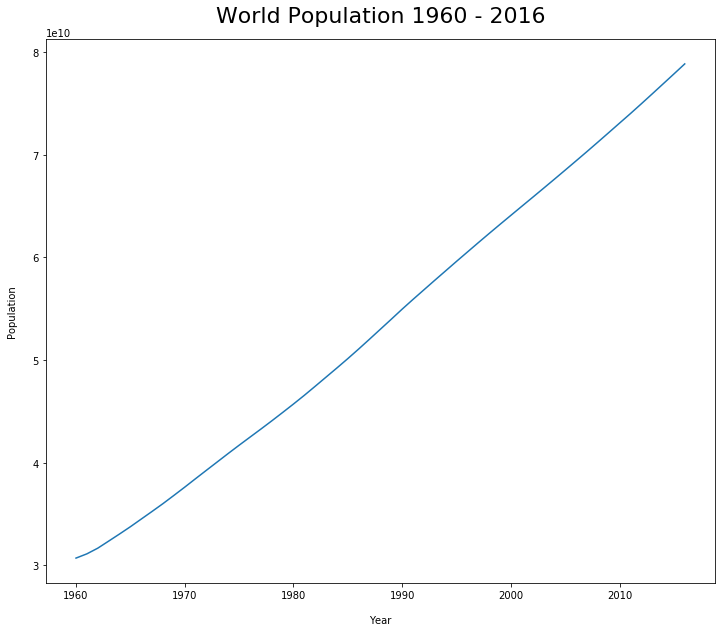

In [21]:
# Line chart for world population

world_df.reset_index(inplace=True)

# world_df.head()

x_axis = world_df['year']
plt.figure(figsize = (12, 10))
plt.plot(x_axis, world_df['population'])

plt.xlabel("Year", labelpad=15)
plt.ylabel("Population", labelpad=15)
plt.title("World Population 1960 - 2016", y=1.02, fontsize=22)
plt.savefig('Resources/Images/world_population.png')

######         As the graph shows above, over the years the World Population Growth had been increasing.

In [22]:
Q2.  What were the population growth rates over time? (i.e. calculate annual % change in population) 

SyntaxError: invalid syntax (<ipython-input-22-76f5f023b67c>, line 1)

In [ ]:
# world_df["pop_growth"] = ""

In [ ]:
# Calculate the percentaget change of population

world_pct_df = world_df.groupby("year").sum()
pct_df = world_pct_df.pct_change()

In [ ]:
pct_df.dropna()

In [ ]:
pct_df.reset_index(inplace=True)

x_axis = pct_df['year']

plt.figure(figsize = (12, 10))
plt.plot(x_axis, pct_df['population'])

plt.xlabel("Year", labelpad=15)
plt.ylabel("Percentage Change", labelpad=15)
plt.title("World Population Change (%) 1961 - 2016", y=1.02, fontsize=22)
plt.savefig('Resources/Images/world_population_change.png')

###### We can see in the graph abve how the World Population Change % significantly increased in the decade of 1960, but in the decade of 1970 statarted to show a drop untiil 1980, and inthe 1990 shows a consistent 
###### drop until 2016.

World Average Fertility Rates

In [ ]:
world_avg = df.groupby('year').mean()

In [ ]:
world_avg.reset_index(inplace=True)
world_avg.head()

In [ ]:
x_axis = world_avg['year']

plt.figure(figsize = (12, 10))
plt.plot(x_axis, world_avg['fertility_rates'])

plt.xlabel("Year", labelpad=15)
plt.ylabel("Fertility Rate", labelpad=15)
plt.title("World Average Fertility Rates 1960 - 2016", y=1.02, fontsize=22)
plt.savefig('Resources/Images/world_avg_fert.png')

###### One factor that could affect the World Population is the Fertility Rate. In the above graph we can see over the years the World average Fertility Rate decreased.

World Average Life Expectancy

In [ ]:
# World average life expectancy

plt.figure(figsize = (12, 10))
plt.plot(x_axis, world_avg['life_expectancy'])

plt.xlabel("Year", labelpad=15)
plt.ylabel("Life Expectancy (Year)", labelpad=15)
plt.title("World Average Life Expectancy 1960 - 2016", y=1.02, fontsize=22)
plt.savefig('Resources/Images/world_avg_life.png')

###### Another factor of interest is Life Expectancy. The graph above shows over the years the World Average Life EXpectancy inceased too.

In [ ]:
world_avg.head()

What is the Correaltion between fertility rates vs population growth rates; life expectancy vs population growth rates

In [ ]:
pct_df.head()

In [ ]:
comparison = pd.merge(world_avg, pct_df, on='year', how='left')

In [ ]:
comparison.head()

In [ ]:
comparison = comparison[['year', 'fertility_rates_x', 'life_expectancy_x', 'population_y']]

In [ ]:
comparison = comparison.rename(columns = {'fertility_rates_x': 'Fertility Rates', 
                             'life_expectancy_x': 'Life Expectancy', 
                             'population_y': 'Population Change'} )

comparison = comparison.dropna()

In [ ]:
# World average fertility rates vs population change
x_values = comparison['Fertility Rates']
y_values = comparison['Population Change']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,0.005),fontsize=15,color="red")
plt.xlabel('Average Fertility Rates')
plt.ylabel('Population Change (%)')
plt.show()
plt.savefig('Resources/Images/avg_fert_scatter.png')
print(f"The r-squared is: {rvalue**2}")

###### To analyze the correlation between the population change and the average fertility rate we use a linear regression analysis. As a result, the scatterplot shows a strong positive linear relationship between Average Fertility Rates and  World Population Change.
###### With a Correlation Coefficient of 0.90 we can conclude there is a large positive linear relationship between Average Fertility RAtes and Population Change.
###### With a r-square of 0.8133 we can account 81.33% of the Popultion change variability deppends of Average Fertility.

In [ ]:
correlation = st.pearsonr(x_values, y_values)
correlation

In [ ]:
correlation_s = st.spearmanr(x_values, y_values)
correlation_s

In [ ]:
# World life expectancy vs population change
x_values2 = comparison['Life Expectancy']
y_values2 = comparison['Population Change']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
regress_values2 = x_values2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values2,"r-")
plt.annotate(line_eq,(57.5,0.005),fontsize=15,color="red")
plt.xlabel('Average Life Expectancy')
plt.ylabel('Population Change (%)')
plt.show()
plt.savefig('Resources/Images/avg_life_scatter.png')
print(f"The r-squared is: {rvalue**2}")

###### To analyze the correlation between the population change and the Average Life Expectancy rate we use a linear regression analysis. As a result, the scatterplot shows a strong negative linear relationship between Average Life Expectancy and  World Population Change.
###### With a Correlation Coefficient of -0.854 we can conclude there is a large negative linear relationship between Average Life Expectancy and Population Change.
###### With a r-square of 0.7299 we can account 72.99% of the Popultion change variability deppends of Average Life Expectancy.

correlation2 = st.pearsonr(x_values2, y_values2)
correlation2

In [ ]:
correlation_s2 = st.spearmanr(x_values2, y_values2)
correlation_s2